In [7]:
import random
import statistics
import numpy as np
import pandas as pd
import sys
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm # importing colormap
plt.style.use('fivethirtyeight')

In [13]:
prob_of_right_step=0.6 # the value of this will control that whether it is biased or unbiased random walk
def take_step():
    if(random.uniform(0,1)<prob_of_right_step):# if it is <0.5 then it should decay, generating a uniform random no btw 0 and 1
        return 1 # as if the coin result is head and the nuclei decays
    else:# if >0.5 then doesn't decay this time
        return (-1)

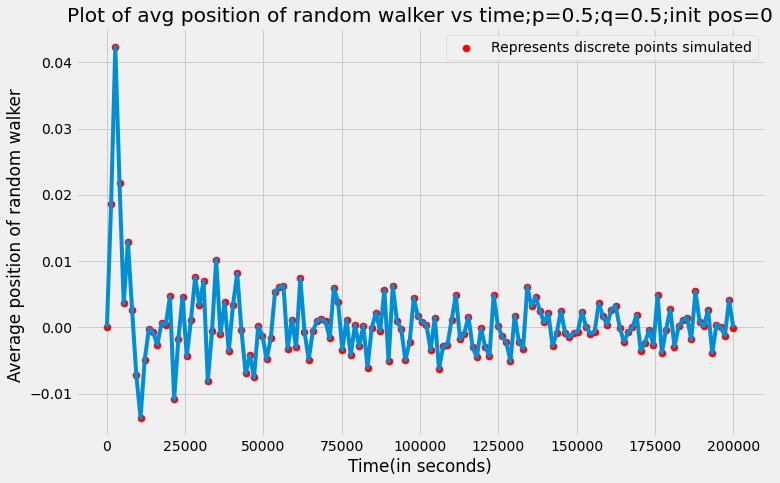

In [13]:
 #no od steps actually represenst time as each step is measured in seconds
step_len=1
init_pos=0


#possible_steps=[0,10,100,400,800,1000,1500]
possible_steps=np.linspace(0,200000,150)
avg_dist_in_cur_trial=np.zeros(len(possible_steps))

x=0
for no_of_steps in possible_steps:
    cur_pos=init_pos
    sum_of_all_pos=0
    no_of_steps=int(no_of_steps)
    for i in range(no_of_steps+1):
        sum_of_all_pos+=take_step()*step_len
    if(no_of_steps!=0): avg_dist_in_cur_trial[x]=sum_of_all_pos/no_of_steps
    x+=1
    
str="Plot of avg position of random walker vs time;p={};q={};init pos={}"
str=str.format(prob_of_right_step,1-prob_of_right_step,init_pos) # str=str.format()
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in seconds)')
plt.ylabel('Average position of random walker ')
plt.scatter(possible_steps,avg_dist_in_cur_trial,c='r',s=50,label='Represents discrete points simulated')
plt.plot(possible_steps,avg_dist_in_cur_trial)
plt.legend()


In [6]:
possible_steps

array([     0.        ,   1342.28187919,   2684.56375839,   4026.84563758,
         5369.12751678,   6711.40939597,   8053.69127517,   9395.97315436,
        10738.25503356,  12080.53691275,  13422.81879195,  14765.10067114,
        16107.38255034,  17449.66442953,  18791.94630872,  20134.22818792,
        21476.51006711,  22818.79194631,  24161.0738255 ,  25503.3557047 ,
        26845.63758389,  28187.91946309,  29530.20134228,  30872.48322148,
        32214.76510067,  33557.04697987,  34899.32885906,  36241.61073826,
        37583.89261745,  38926.17449664,  40268.45637584,  41610.73825503,
        42953.02013423,  44295.30201342,  45637.58389262,  46979.86577181,
        48322.14765101,  49664.4295302 ,  51006.7114094 ,  52348.99328859,
        53691.27516779,  55033.55704698,  56375.83892617,  57718.12080537,
        59060.40268456,  60402.68456376,  61744.96644295,  63087.24832215,
        64429.53020134,  65771.81208054,  67114.09395973,  68456.37583893,
        69798.65771812,  

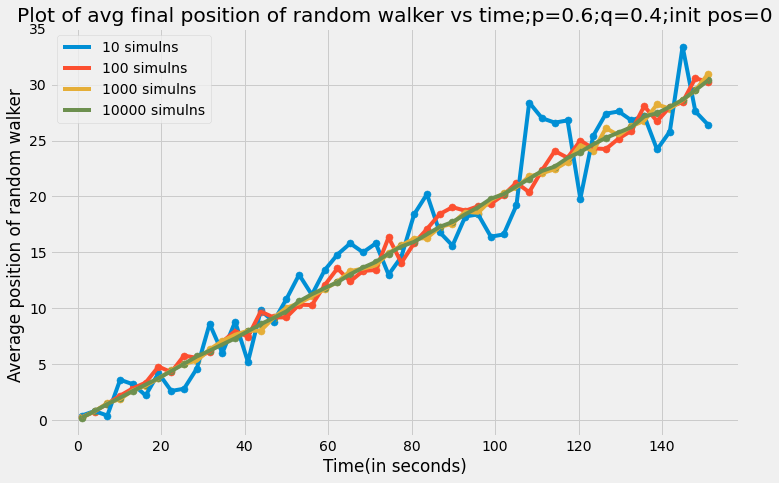

In [6]:
 #no od steps actually represenst time as each step is measured in seconds
step_len=1
init_pos=0


#possible_steps=[0,10,100,400,800,1000,1500]
possible_steps=np.linspace(1,151)
avg_final_pos_in_cur_trial=np.zeros(len(possible_steps))

str="Plot of avg final position of random walker vs time;p={};q={};init pos={}"
str=str.format(prob_of_right_step,np.round(1-prob_of_right_step,2),init_pos) # str=str.format()
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in seconds)')
plt.ylabel('Average position of random walker ')

list_of_simulns=[10,100,1000]
for no_of_simulations in list_of_simulns:
    x=0
    for no_of_steps in possible_steps:
        cur_pos=init_pos
        sum_of_final_pos=0
        no_of_steps=int(no_of_steps)
        for y in range(no_of_simulations): 
            final_pos=0
            for i in range(no_of_steps):
                final_pos+=take_step()*step_len
            sum_of_final_pos+=final_pos
        if(no_of_steps!=0): avg_final_pos_in_cur_trial[x]=sum_of_final_pos/no_of_simulations
        x+=1
    plt.scatter(possible_steps,avg_final_pos_in_cur_trial,s=50)
    str='{} simulns'
    str=str.format(no_of_simulations)
    plt.plot(possible_steps,avg_final_pos_in_cur_trial,label=str)
plt.legend()


In [9]:
init_pos=0

def random_Walk_Dist(no_of_steps):
        cur_pos=init_pos
        for i in range(no_of_steps):
            cur_pos+=take_step()
        return abs(cur_pos-init_pos)
    
    

In [10]:
def mean_random_walk_dist(no_of_steps,numTests):
    sum_of_dist_in_rand_walk=0
    for i in range(numTests):
        sum_of_dist_in_rand_walk+=random_Walk_Dist(no_of_steps)
    return sum_of_dist_in_rand_walk/numTests
    

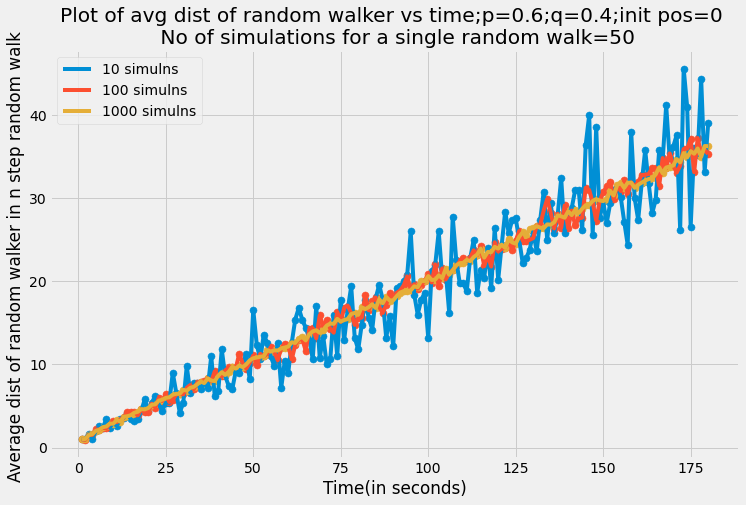

In [11]:
step_sizes=np.arange(1,181)
list_of_simulns=[10,100,1000]
str="Plot of avg dist of random walker vs time;p={};q={};init pos={} \n No of simulations for a single random walk={}"
str=str.format(prob_of_right_step,np.round(1-prob_of_right_step,2),init_pos,50) # str=str.format()
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in seconds)')
plt.ylabel('Average dist of random walker in n step random walk ')


for no_of_simulns in list_of_simulns:
    avg_dist=np.zeros(len(step_sizes))
    x=0
    for step_size in step_sizes:
       avg_dist[x]=mean_random_walk_dist(step_size,no_of_simulns) 
       x+=1
    plt.scatter(step_sizes,avg_dist,s=50)
    str='{} simulns'
    str=str.format(no_of_simulns)
    plt.plot(step_sizes,avg_dist,label=str)
plt.legend()    

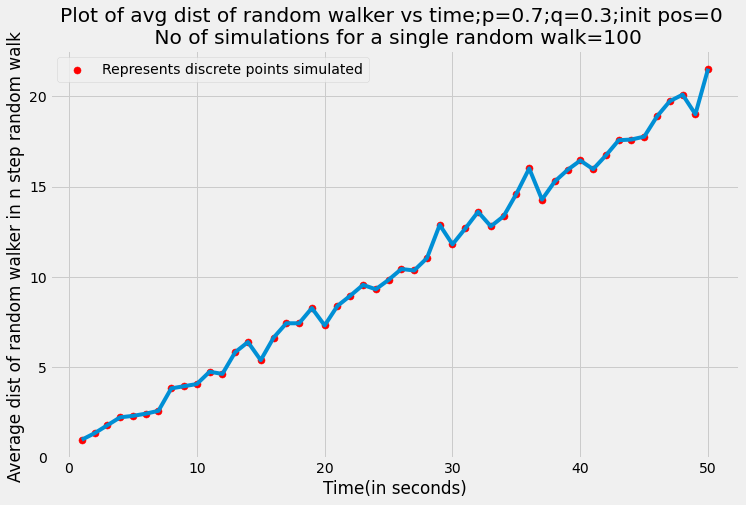

In [16]:
step_sizes=np.arange(1,51)
avg_dist=np.zeros(len(step_sizes))

x=0
for step_size in step_sizes:
   avg_dist[x]=mean_random_walk_dist(step_size,50) 
   x+=1
str="Plot of avg dist of random walker vs time;p={};q={};init pos={} \n No of simulations for a single random walk={}"
str=str.format(prob_of_right_step,np.round(1-prob_of_right_step,2),init_pos,100) # str=str.format()
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in seconds)')
plt.ylabel('Average dist of random walker in n step random walk ')
plt.scatter(step_sizes,avg_dist,c='r',s=50,label='Represents discrete points simulated')
plt.plot(step_sizes,avg_dist)
plt.legend()    

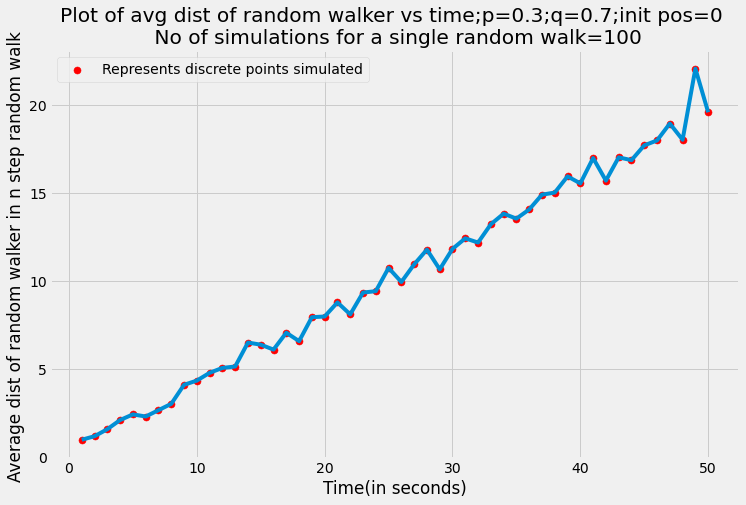

In [20]:
step_sizes=np.arange(1,51)
avg_dist=np.zeros(len(step_sizes))

x=0
for step_size in step_sizes:
   avg_dist[x]=mean_random_walk_dist(step_size,50) 
   x+=1
str="Plot of avg dist of random walker vs time;p={};q={};init pos={} \n No of simulations for a single random walk={}"
str=str.format(prob_of_right_step,np.round(1-prob_of_right_step,2),init_pos,100) # str=str.format()
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in seconds)')
plt.ylabel('Average dist of random walker in n step random walk ')
plt.scatter(step_sizes,avg_dist,c='r',s=50,label='Represents discrete points simulated')
plt.plot(step_sizes,avg_dist)
plt.legend()    

## Q1 b 

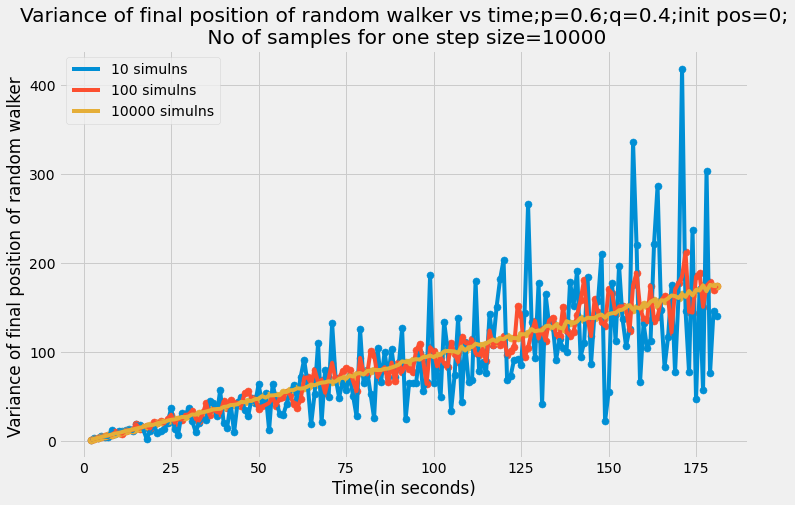

In [187]:
 #no od steps actually represenst time as each step is measured in seconds
step_len=1
init_pos=0


#possible_steps=[0,10,100,400,800,1000,1500]
#possible_steps=np.linspace(2,20000,150)
possible_steps=np.arange(2,182)
var_in_cur_trial=np.zeros(len(possible_steps))
list_of_no_of_samples_in_one_trial=[10,100,10000]

str="Variance of final position of random walker vs time;p={};q={};init pos={};\n No of samples for one step size={}"
str=str.format(prob_of_right_step,np.round(1-prob_of_right_step,2),init_pos,no_of_samples_in_one_trial) # str=str.format()
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in seconds)')
plt.ylabel('Variance of final position of random walker ')

for no_of_samples_in_one_trial in list_of_no_of_samples_in_one_trial:
    y=0
    for no_of_steps in possible_steps:
        no_of_steps=int(no_of_steps)

        pos_after_step_size_in_trial=np.zeros(no_of_samples_in_one_trial)

        for x in range(no_of_samples_in_one_trial):
            sum_of_pos=0
            for i in range(no_of_steps):
                sum_of_pos+=take_step()*step_len
            pos_after_step_size_in_trial[x]=sum_of_pos    

        if(no_of_steps!=0): var_in_cur_trial[y]=(statistics.stdev(pos_after_step_size_in_trial))**2
        #print(var_in_cur_trial[x]," ; ",np.var(pos_after_step_size_in_trial))
        y+=1

#         possible_steps=np.delete(possible_steps,[0])
#         var_in_cur_trial=np.delete(var_in_cur_trial,[0])
    plt.scatter(possible_steps,var_in_cur_trial,s=50)
    str='{} simulns'
    str=str.format(no_of_samples_in_one_trial)
    plt.plot(possible_steps,var_in_cur_trial,label=str)
plt.legend()


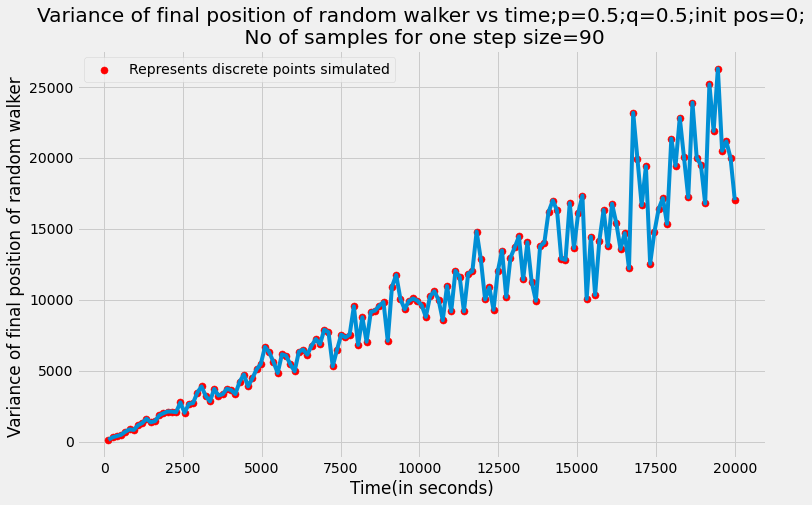

In [44]:
 #no od steps actually represenst time as each step is measured in seconds
step_len=1
init_pos=0


#possible_steps=[0,10,100,400,800,1000,1500]
possible_steps=np.linspace(2,20000,150)
var_in_cur_trial=np.zeros(len(possible_steps))
no_of_samples_in_one_trial=90

y=0
for no_of_steps in possible_steps:
    no_of_steps=int(no_of_steps)
    
    pos_after_step_size_in_trial=np.zeros(no_of_samples_in_one_trial)
    
    for x in range(no_of_samples_in_one_trial):
        sum_of_pos=0
        for i in range(no_of_steps):
            sum_of_pos+=take_step()*step_len
        pos_after_step_size_in_trial[x]=sum_of_pos    
            
    if(no_of_steps!=0): var_in_cur_trial[y]=(statistics.stdev(pos_after_step_size_in_trial))**2
    #print(var_in_cur_trial[x]," ; ",np.var(pos_after_step_size_in_trial))
    y+=1
    
str="Variance of final position of random walker vs time;p={};q={};init pos={};\n No of samples for one step size={}"
str=str.format(prob_of_right_step,np.round(1-prob_of_right_step,2),init_pos,no_of_samples_in_one_trial) # str=str.format()
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in seconds)')
plt.ylabel('Variance of final position of random walker ')
possible_steps=np.delete(possible_steps,[0])
var_in_cur_trial=np.delete(var_in_cur_trial,[0])
plt.scatter(possible_steps,var_in_cur_trial,c='r',s=50,label='Represents discrete points simulated')
plt.plot(possible_steps,var_in_cur_trial)
plt.legend()


In [12]:
init_pos=0
def random_Walk_Pos(no_of_steps):
    cur_pos=init_pos
    for i in range(no_of_steps):
        cur_pos+=take_step()
    return cur_pos # 100 simulations for this particular step random walk

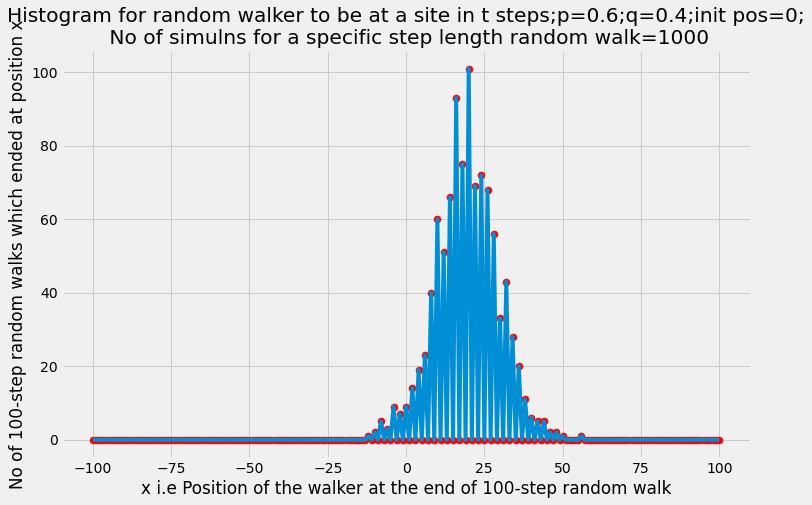

In [14]:
no_of_simul=1000
no_of_steps=100
neg_steps=list(np.arange(-100,1))
pos_steps=list(np.arange(1,101))
#print(type(neg_steps))
#print(type(pos_steps))
neg_steps.extend(pos_steps)
#print(type(neg_steps))
possible_pos=neg_steps
#print(type(possible_pos))
freq_of_pos=np.zeros(len(possible_pos))

for i in range(no_of_simul):# performing 500 simulations of the 100-step random walk
    freq_of_pos[random_Walk_Pos(no_of_steps)+100]+=1              #final position after taking these many no of steps
    
str="Histogram for random walker to be at a site in t steps;p={};q={};init pos={};\n No of simulns for a specific step length random walk={}"
str=str.format(prob_of_right_step,np.round(1-prob_of_right_step,2),init_pos,no_of_simul) # str=str.format()
plt.figure(figsize=(11,7))
plt.title(str)
str1='x i.e Position of the walker at the end of {}-step random walk'
str1=str1.format(no_of_steps)
plt.xlabel(str1)
str2='No of {}-step random walks which ended at position x'
str2=str2.format(no_of_steps)
plt.ylabel(str2)
plt.scatter(possible_pos,freq_of_pos,c='r',s=50,label='Represents discrete points simulated')
plt.plot(possible_pos,freq_of_pos)
#plt.legend()


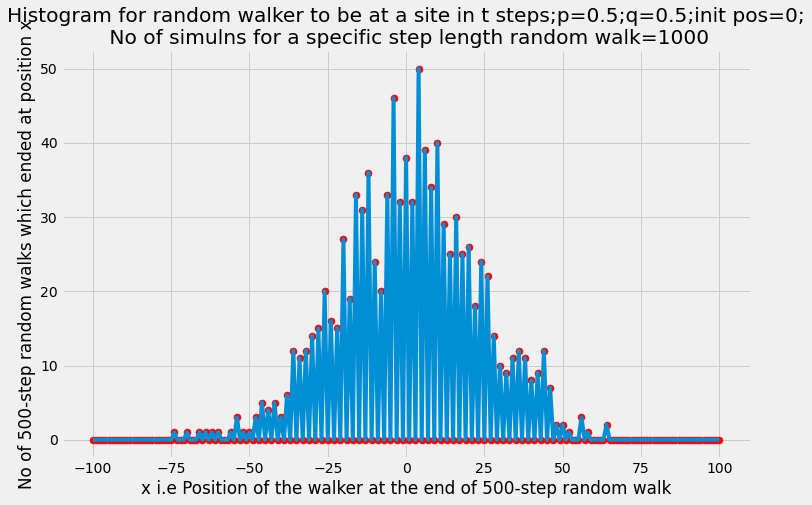

In [30]:
no_of_simul=1000
no_of_steps=500
neg_steps=list(np.arange(-100,1))
pos_steps=list(np.arange(1,101))
#print(type(neg_steps))
#print(type(pos_steps))
neg_steps.extend(pos_steps)
#print(type(neg_steps))
possible_pos=neg_steps
#print(type(possible_pos))
freq_of_pos=np.zeros(len(possible_pos))

for i in range(no_of_simul):# performing 500 simulations of the 100-step random walk
    freq_of_pos[random_Walk_Pos(no_of_steps)+100]+=1              #final position after taking these many no of steps
    
str="Histogram for random walker to be at a site in t steps;p={};q={};init pos={};\n No of simulns for a specific step length random walk={}"
str=str.format(prob_of_right_step,np.round(1-prob_of_right_step,2),init_pos,no_of_simul) # str=str.format()
plt.figure(figsize=(11,7))
plt.title(str)
str1='x i.e Position of the walker at the end of {}-step random walk'
str1=str1.format(no_of_steps)
plt.xlabel(str1)
str2='No of {}-step random walks which ended at position x'
str2=str2.format(no_of_steps)
plt.ylabel(str2)
plt.scatter(possible_pos,freq_of_pos,c='r',s=50,label='Represents discrete points simulated')
plt.plot(possible_pos,freq_of_pos)
#plt.legend()


In [16]:
neg_steps=list(np.arange(-100,1))
neg_steps.extend(pos_steps)
possible_pos=neg_steps
len(possible_pos)

201

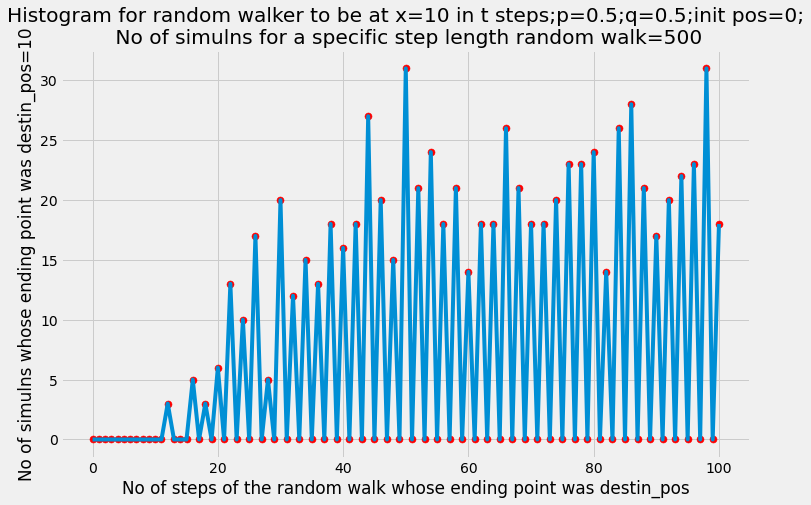

In [44]:
no_of_simul=500
step_sizes=np.arange(0,101) # [1,2,3,.......,50]
init_pos=0
destin_pos=10
freq_step_size=np.zeros(len(step_sizes))

for st in step_sizes:
    for i in range(no_of_simul):
        if(random_Walk_Pos(st)==destin_pos):
            freq_step_size[st]+=1

str="Histogram for random walker to be at x={} in t steps;p={};q={};init pos={};\n No of simulns for a specific step length random walk={}"
str=str.format(destin_pos,prob_of_right_step,np.round(1-prob_of_right_step,2),init_pos,no_of_simul) # str=str.format()
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('No of steps of the random walk whose ending point was destin_pos')
str2='No of simulns whose ending point was destin_pos={}'
str2=str2.format(destin_pos)
plt.ylabel(str2)
plt.scatter(step_sizes,freq_step_size,c='r',s=50,label='Represents discrete points simulated')
plt.plot(step_sizes,freq_step_size)
#plt.legend()


In [45]:
freq_step_size

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,
        0.,  0.,  0.,  5.,  0.,  3.,  0.,  6.,  0., 13.,  0., 10.,  0.,
       17.,  0.,  5.,  0., 20.,  0., 12.,  0., 15.,  0., 13.,  0., 18.,
        0., 16.,  0., 18.,  0., 27.,  0., 20.,  0., 15.,  0., 31.,  0.,
       21.,  0., 24.,  0., 18.,  0., 21.,  0., 14.,  0., 18.,  0., 18.,
        0., 26.,  0., 21.,  0., 18.,  0., 18.,  0., 20.,  0., 23.,  0.,
       23.,  0., 24.,  0., 14.,  0., 26.,  0., 28.,  0., 21.,  0., 17.,
        0., 20.,  0., 22.,  0., 23.,  0., 31.,  0., 18.])

## Q1 d 

In [196]:
prob_of_right_step=0.5 # u have to take a uniform random no btw 0 and 1
mu=0
sigma=1
def take_step2():
    return np.random.normal()

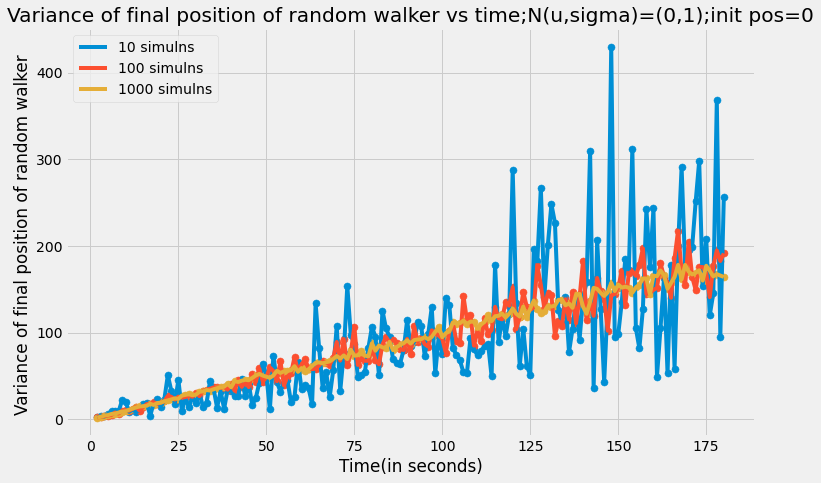

In [199]:
 #no od steps actually represenst time as each step is measured in seconds
step_len=1
init_pos=0

possible_steps=np.arange(2,181)
var_in_cur_trial=np.zeros(len(possible_steps))
list_of_no_of_samples_in_one_trial=[10,100,1000]

str="Variance of final position of random walker vs time;N(u,sigma)=({},{});init pos={}"
str=str.format(mu,sigma,init_pos,no_of_samples_in_one_trial) # str=str.format()
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in seconds)')
plt.ylabel('Variance of final position of random walker ')

for no_of_samples_in_one_trial in list_of_no_of_samples_in_one_trial:
    y=0
    for no_of_steps in possible_steps:
        no_of_steps=int(no_of_steps)

        pos_after_step_size_in_trial=np.zeros(no_of_samples_in_one_trial)

        for x in range(no_of_samples_in_one_trial):
            sum_of_pos=0
            for i in range(no_of_steps):
                sum_of_pos+=take_step2()*step_len
            pos_after_step_size_in_trial[x]=sum_of_pos    
            
        if(no_of_steps!=0): var_in_cur_trial[y]=(statistics.stdev(pos_after_step_size_in_trial))**2
        y+=1
    plt.scatter(possible_steps,var_in_cur_trial,s=50)
    str='{} simulns'
    str=str.format(no_of_samples_in_one_trial)
    plt.plot(possible_steps,var_in_cur_trial,label=str)
plt.legend()


In [203]:
init_pos=0
def random_Walk_Dist(no_of_steps):
        cur_pos=init_pos
        for i in range(no_of_steps):
            cur_pos+=take_step2()
        return abs(cur_pos-init_pos)

In [204]:
def mean_random_walk_dist(no_of_steps,numTests):
    sum_of_dist_in_rand_walk=0
    for i in range(numTests):
        sum_of_dist_in_rand_walk+=random_Walk_Dist(no_of_steps)
    return sum_of_dist_in_rand_walk/numTests

KeyboardInterrupt: 

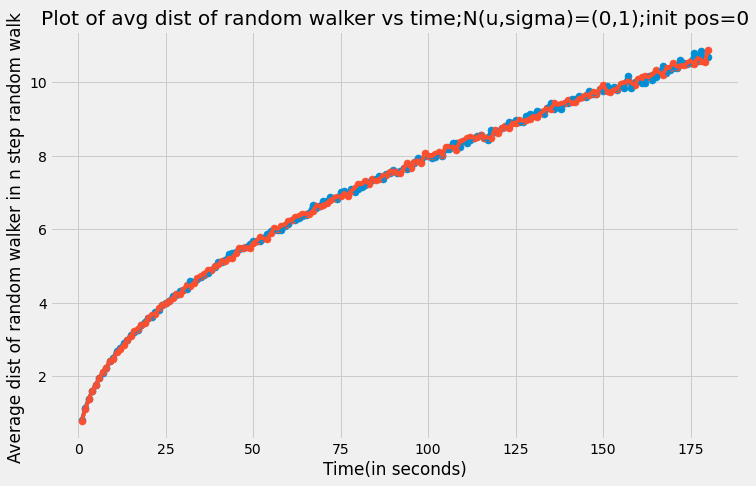

In [206]:
step_sizes=np.arange(1,181)
avg_dist=np.zeros(len(step_sizes))

str="Plot of avg dist of random walker vs time;N(u,sigma)=({},{});init pos={}"
str=str.format(mu,sigma,init_pos,no_of_simulns) # str=str.format()
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in seconds)')
plt.ylabel('Average dist of random walker in n step random walk ')

possible_simulns=[10,100,1000]

for no_of_simulns in possible_simulns:
    x=0
    for step_size in step_sizes:
       avg_dist[x]=mean_random_walk_dist(step_size,10000) 
       x+=1
    str='{} simulns'
    str=str.format(no_of_simulns)
    plt.scatter(step_sizes,avg_dist,s=50,label=str)
    plt.plot(step_sizes,avg_dist)
plt.legend()    

# Q2 

In [65]:
def randomWalkPoints(no_of_steps):
    lst=[[0,0]]
    cur_x,cur_y=0,0
    for i in range(no_of_steps):
        if(take_step()==1):
            cur_x+=1
        else:
            cur_x-=1
        
        if(take_step()==1):
            cur_y+=1
        else:
            cur_y-=1
        lst.append([cur_x,cur_y])
    return lst
    

In [29]:
init_x,init_y=0,0
def random_Walk_Dist2D(no_of_steps):
    cur_x,cur_y=init_x,init_y
    for i in range(no_of_steps):
        if(take_step()==1):
            cur_x+=1
        else:
            cur_x-=1
        
        if(take_step()==1):
            cur_y+=1
        else:
            cur_y-=1
    return np.sqrt((cur_x-init_x)**2+(cur_y-init_y)**2)

In [30]:
def mean_random_walk_dist2D(no_of_steps,noOfSimuls):
    sum_of_dist_in_rand_walk=0
    for i in range(noOfSimuls):
        sum_of_dist_in_rand_walk+=random_Walk_Dist2D(no_of_steps)
    return sum_of_dist_in_rand_walk/noOfSimuls # avg dist in 50 simulns of 25-step random walk

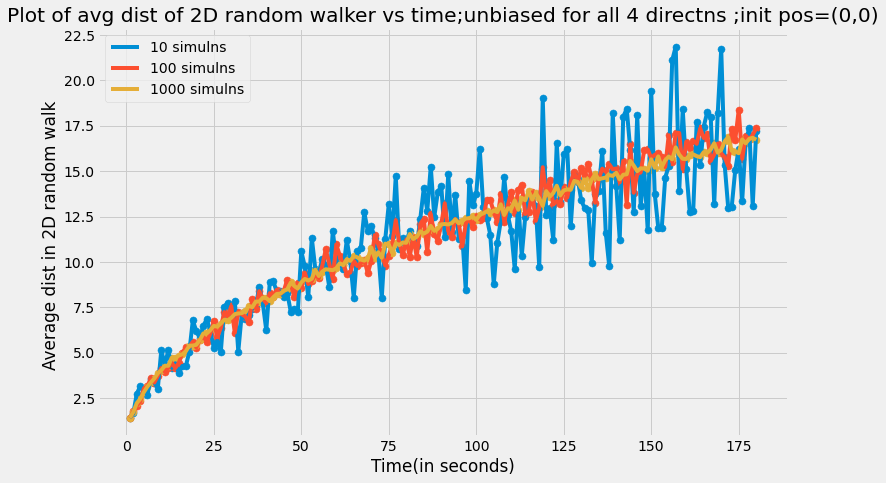

In [201]:

step_sizes=np.arange(1,181)
list_of_simulns=[10,100,1000]
str="Plot of avg dist of 2D random walker vs time;unbiased for all 4 directns ;init pos=({},{})"
str=str.format(init_x,init_y,100) # str=str.format()
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in seconds)')
plt.ylabel('Average dist in 2D random walk ')


for no_of_simulns in list_of_simulns:
    avg_dist=np.zeros(len(step_sizes))
    x=0
    for step_size in step_sizes:
       avg_dist[x]=mean_random_walk_dist2D(step_size,no_of_simulns) 
       x+=1
    plt.scatter(step_sizes,avg_dist,s=50)
    str='{} simulns'
    str=str.format(no_of_simulns)
    plt.plot(step_sizes,avg_dist,label=str)
plt.legend()    




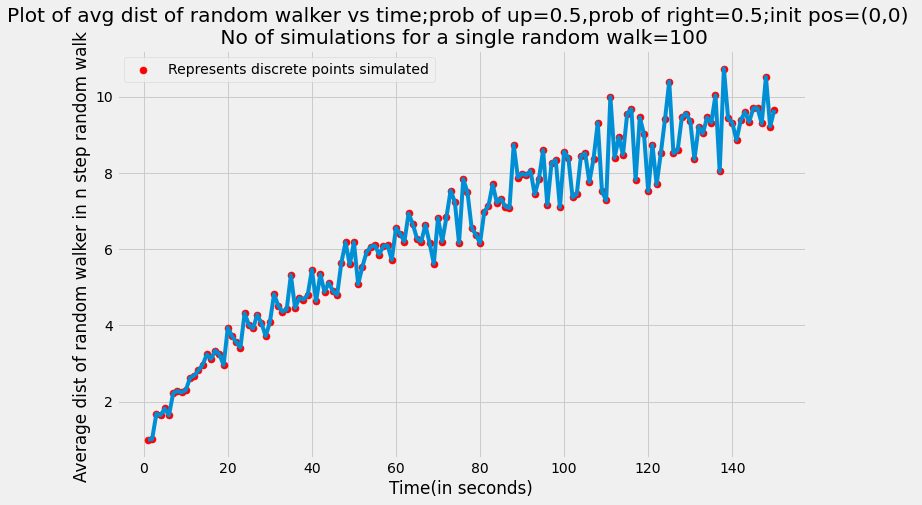

In [32]:
prob_of_up,prob_of_down=0.5,0.5
step_sizes=np.arange(1,151)
avg_dist=np.zeros(len(step_sizes))

x=0
for step_size in step_sizes:
   avg_dist[x]=mean_random_walk_dist(step_size,100) 
   x+=1
str="Plot of avg dist of random walker vs time;prob of up={},prob of right={};init pos=({},{}) \n No of simulations for a single random walk={}"
str=str.format(prob_of_up,prob_of_down,init_x,init_y,100) # str=str.format()
plt.figure(figsize=(11,7))
plt.title(str)
plt.xlabel('Time(in seconds)')
plt.ylabel('Average dist of random walker in n step random walk ')
plt.scatter(step_sizes,avg_dist,c='r',s=50,label='Represents discrete points simulated')
plt.plot(step_sizes,avg_dist)
plt.legend()    

In [150]:
def animateWalk2D(lst):
    cur_xmax,cur_xmin=-sys.maxsize,sys.maxsize
    cur_ymax,cur_ymin=-sys.maxsize,sys.maxsize
    
    for ls in lst:
        cur_xmax=max(cur_xmax,ls[0])
        cur_xmin=min(cur_xmin,ls[0])
    
        cur_ymax=max(cur_ymax,ls[1])
        cur_ymin=min(cur_ymin,ls[1])
        
    print(cur_xmin," ",cur_xmax," ",cur_ymin," ",cur_ymax)
    
    fig,ax=plt.subplots(3,3,figsize=(15,15))
        
    for i in range(3):
        for j in range(3):
             last_index=3*i+j
#            plt.xlim(cur_xmin,cur_xmax)
#            plt.ylim(cur_ymin,cur_ymax)
             x_pts=lst[:last_index+1,0]
             y_pts=lst[:last_index+1,1]
                
            
             ax[i][j].set_xlim(cur_xmin-1,cur_xmax+1)
             ax[i][j].set_ylim(cur_ymin-1,cur_ymax+1)
#              ax[i][j].set_xticklabels(np.arange(cur_xmin-1,cur_xmax+2))
#              ax[i][j].set_yticklabels(np.arange(cur_ymin-1,cur_ymax+2))
             ax[i][j].scatter(x_pts,y_pts,c='blue',s=110)
             ax[i][j].plot(x_pts,y_pts,c='blue',lw=2)   
             ax[i][j].scatter(lst[0][0],lst[0][1],c='black',s=110)
             ax[i][j].scatter(lst[last_index][0],lst[last_index][1],c='black',s=110)
#                 #for x in np.arange(1,last_index):
#                 ax[i][j].scatter(,,c='blue')
    
        
    

-7   0   -3   1


array([[ 0,  0],
       [-1, -1],
       [-2,  0],
       [-3,  1],
       [-4,  0],
       [-5, -1],
       [-6, -2],
       [-7, -3],
       [-6, -2]])

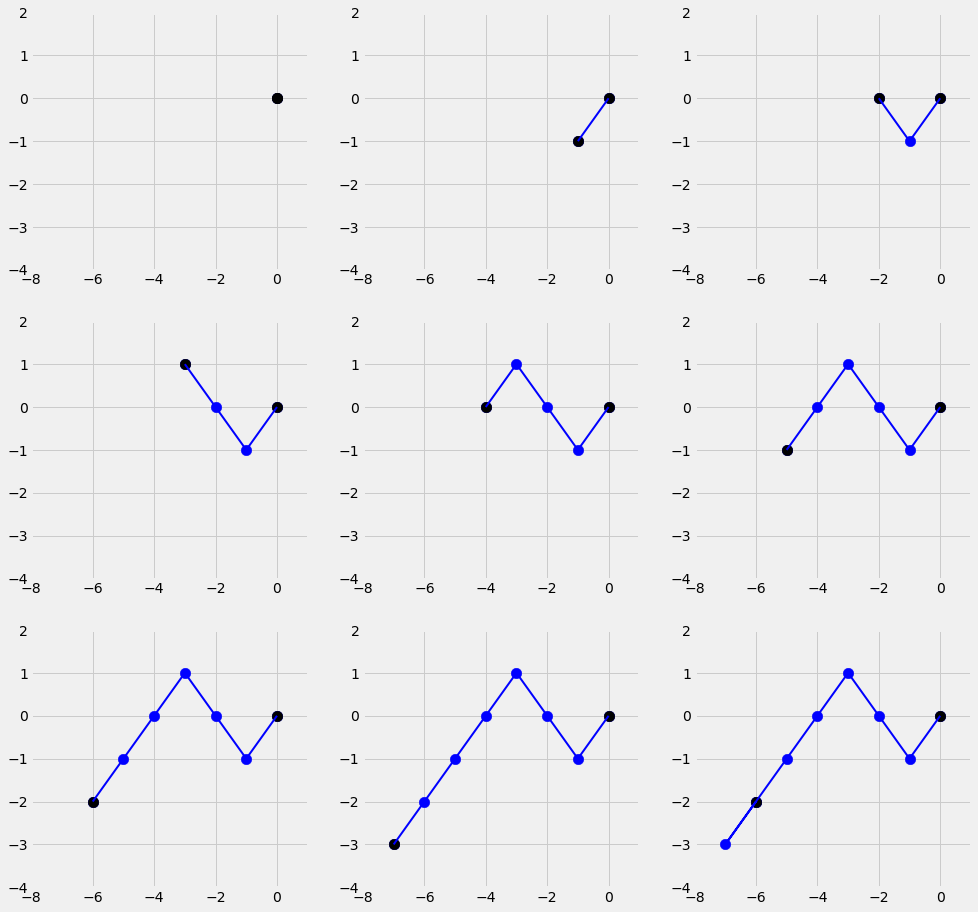

In [151]:
list_pts=randomWalkPoints(8)
list_pts=np.array(list_pts)
animateWalk2D(list_pts)
list_pts
# x_pts=list_pts[:4,0]
# x_pts

# Q2 d 

In [158]:
def randomWalkPoints_8_Direc(no_of_steps):
    lst=[[0,0]]
    cur_x,cur_y=0,0
    for i in range(no_of_steps):
        num=random.randint(0,99)+1
        if(num<=19):
            cur_y+=1
        elif(num>=20 and num<=43):
            cur_x+=1
            cur_y+=1
        elif(num>=44 and num<=60):
            cur_x+=1
        elif(num>=61 and num<=70):
            cur_x+=1
            cur_y-=1
        elif(num>=71 and num<=72):
            cur_y-=1
        elif(num>=73 and num<=75):
            cur_x-=1
            cur_y-=1
        elif(num>=76 and num<=85):
            cur_x-=1
        else:
            cur_x-=1
            cur_y+=1
        lst.append([cur_x,cur_y])
    return lst
    

In [162]:
def animateWalk2D_8_direc(lst):
    cur_xmax,cur_xmin=-sys.maxsize,sys.maxsize
    cur_ymax,cur_ymin=-sys.maxsize,sys.maxsize
    
    no_of_points=len(lst)
    
    for ls in lst:
        cur_xmax=max(cur_xmax,ls[0])
        cur_xmin=min(cur_xmin,ls[0])
    
        cur_ymax=max(cur_ymax,ls[1])
        cur_ymin=min(cur_ymin,ls[1])
        
    print(cur_xmin," ",cur_xmax," ",cur_ymin," ",cur_ymax)
    
    rows=int(no_of_points/4)
    cols=4
    
    fig,ax=plt.subplots(rows,cols,figsize=(15,15))
        
    for i in range(rows):
        for j in range(cols):
             last_index=cols*i+j
             x_pts=lst[:last_index+1,0]
             y_pts=lst[:last_index+1,1]
                
             ax[i][j].set_xlim(cur_xmin-1,cur_xmax+1)
             ax[i][j].set_ylim(cur_ymin-1,cur_ymax+1)
#              ax[i][j].set_xticklabels(np.arange(cur_xmin-1,cur_xmax+2))
#              ax[i][j].set_yticklabels(np.arange(cur_ymin-1,cur_ymax+2))
             ax[i][j].scatter(x_pts,y_pts,c='blue',s=110)
             ax[i][j].plot(x_pts,y_pts,c='blue',lw=2)   
             ax[i][j].scatter(lst[0][0],lst[0][1],c='black',s=110)
             ax[i][j].scatter(lst[last_index][0],lst[last_index][1],c='black',s=110)
#                 #for x in np.arange(1,last_index):
#                 ax[i][j].scatter(,,c='blue')
    
        
    


0   5   0   5


array([[0, 0],
       [1, 0],
       [2, 0],
       [2, 1],
       [2, 2],
       [3, 2],
       [3, 3],
       [4, 4],
       [5, 3],
       [4, 4],
       [4, 5],
       [5, 4],
       [4, 4],
       [5, 4],
       [4, 3],
       [5, 3]])

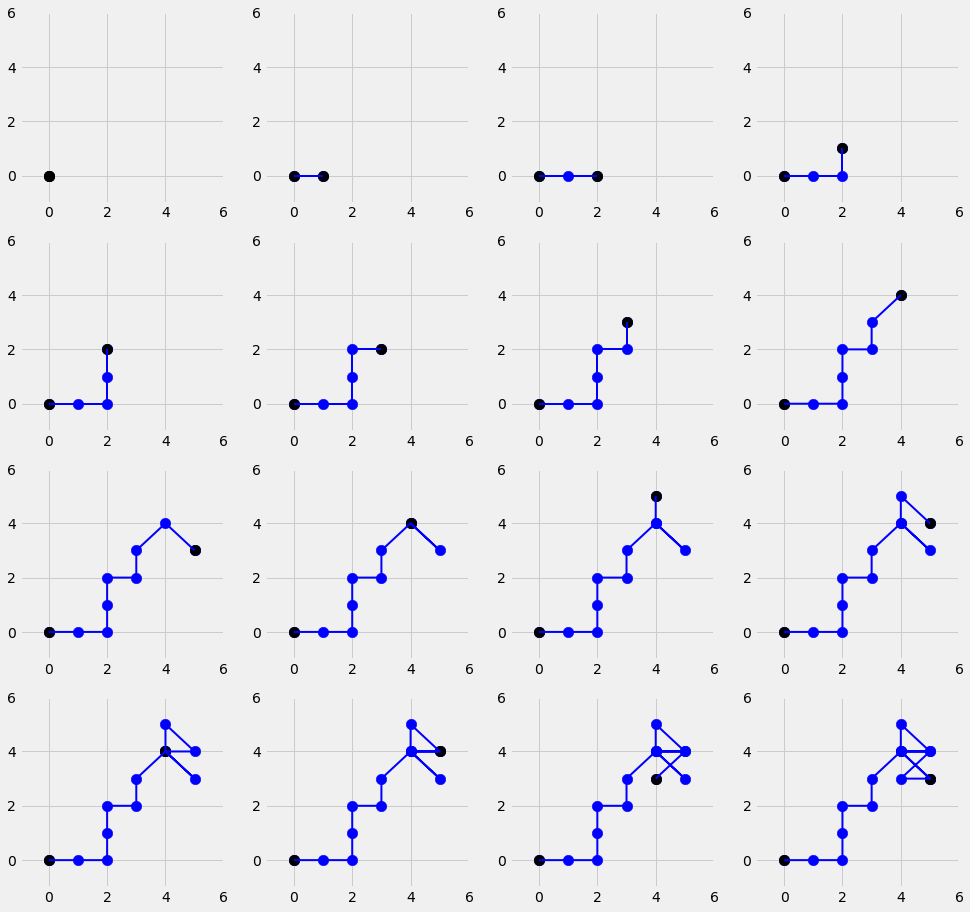

In [163]:
list_pts=randomWalkPoints_8_Direc(15)
list_pts=np.array(list_pts)
animateWalk2D_8_direc(list_pts)
list_pts

-1   3   0   10


array([[ 0,  0],
       [-1,  1],
       [ 0,  1],
       [ 1,  2],
       [ 2,  2],
       [ 1,  2],
       [ 2,  3],
       [ 1,  4],
       [ 0,  4],
       [ 1,  5],
       [ 2,  6],
       [ 2,  7],
       [ 3,  7],
       [ 3,  8],
       [ 3,  9],
       [ 3, 10]])

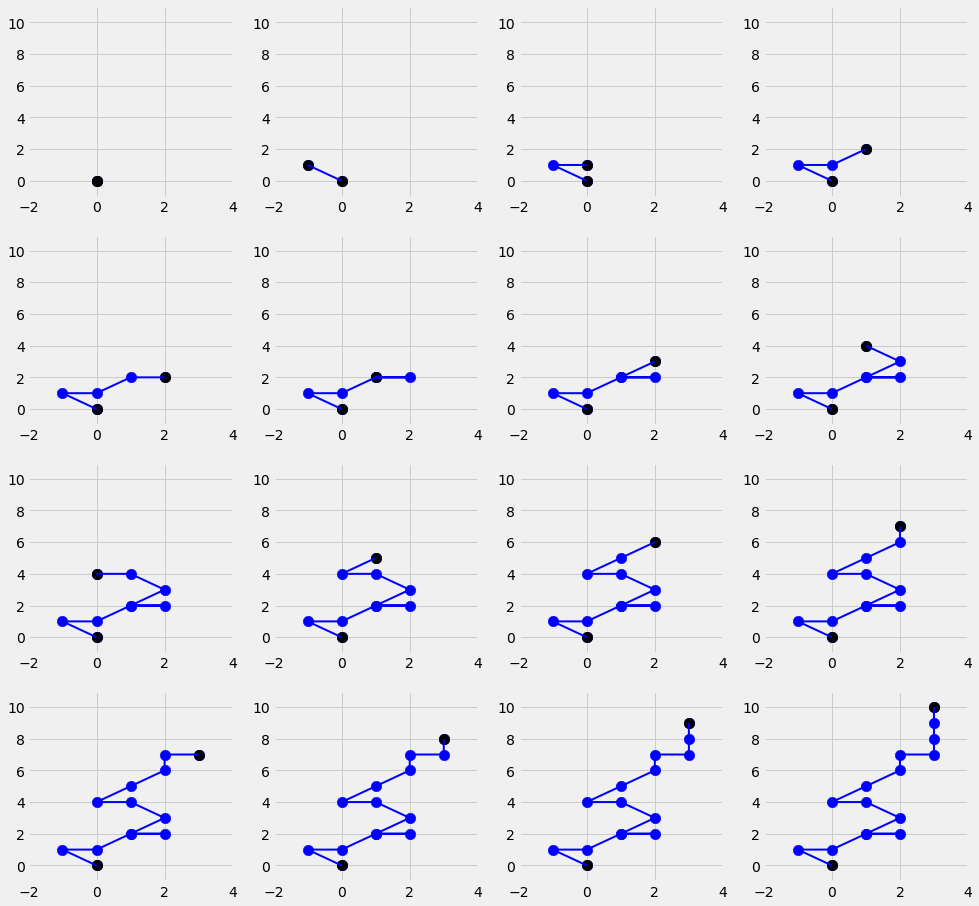

In [164]:
list_pts=randomWalkPoints_8_Direc(15)
list_pts=np.array(list_pts)
animateWalk2D_8_direc(list_pts)
list_pts

-1   3   0   7


array([[ 0,  0],
       [-1,  1],
       [-1,  2],
       [ 0,  3],
       [-1,  4],
       [ 0,  4],
       [ 1,  3],
       [ 0,  3],
       [ 1,  3],
       [ 0,  4],
       [ 1,  4],
       [ 0,  5],
       [ 1,  6],
       [ 2,  6],
       [ 3,  7],
       [ 3,  6]])

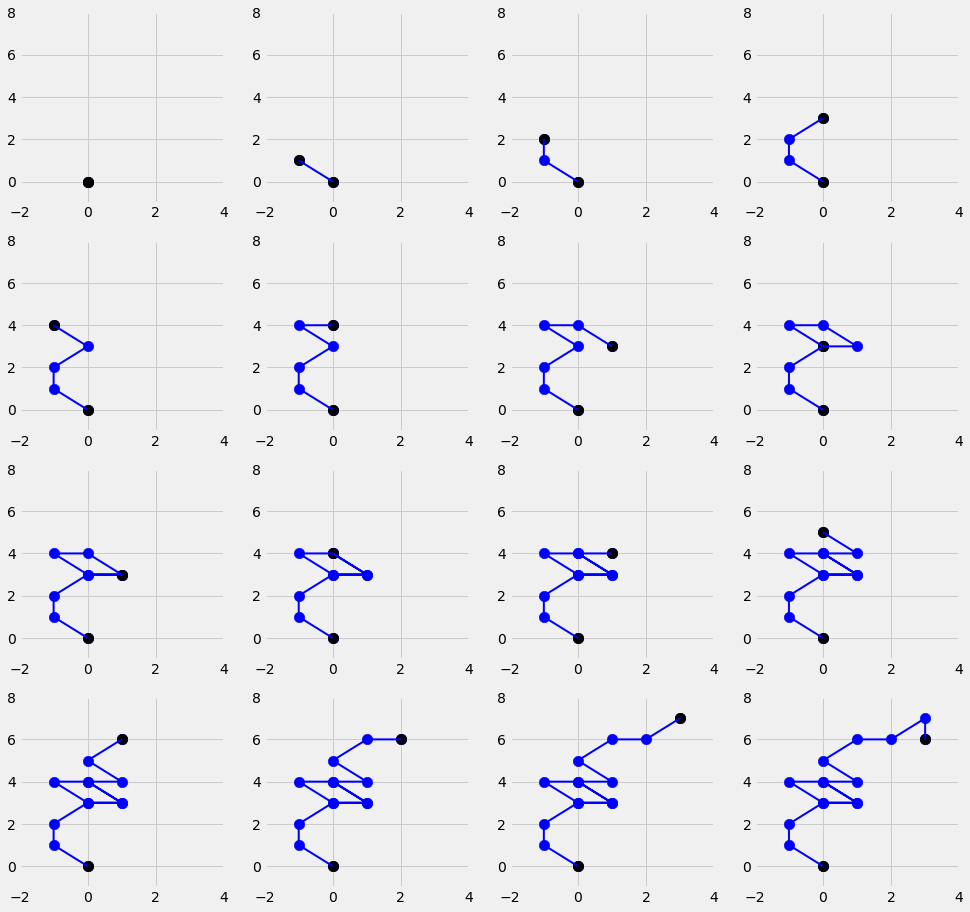

In [167]:
list_pts=randomWalkPoints_8_Direc(15)
list_pts=np.array(list_pts)
animateWalk2D_8_direc(list_pts)
list_pts